In [1]:
%matplotlib qt5
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = hs.load('009_3nm_55rot_512x512_compass.zspy', lazy=True)

In [5]:
s.plot()

In [4]:
s_sum = s.sum(axis=(-1,-2))
s_nav = s_sum.transpose()
s_nav.compute()
s.navigator = s_nav
s_nav.plot()

[########################################] | 100% Completed | 2.24 sms


In [5]:
#s.plot()

In [6]:
s1 = s.isig[:,:]

In [7]:
s1.navigator = s_nav
s1.compute()
s1_com = s1.center_of_mass()
s1_com_corr = s1_com.correct_ramp()
s1_bs = s1_com.to_beamshift()
s_mask = hs.signals.Signal2D(np.ones((512, 513), dtype=bool))
s_mask.data[100:-90, 100:-90] = False
s1_bs_masked = s1_bs.deepcopy()
s1_bs_masked.make_linear_plane()
s1_bs_linear_plane = s1_bs.deepcopy()
s1_bs_linear_plane.make_linear_plane()


[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 19.11 s


In [8]:
#s1_bs.plot()

In [10]:
s1_bs

<BeamShift, title: , dimensions: (513, 512|2)>

In [11]:
s1_bs_masked

<BeamShift, title: , dimensions: (513, 512|2)>

In [9]:
s_mask = hs.signals.Signal2D(np.zeros((512, 513), dtype=bool))
s_mask.data[100:-90, 100:-90] = True
s1_bs_masked.make_linear_plane(mask=s_mask)


In [10]:
s1_bs.plot()

In [11]:
s1_bs_masked.plot()

In [12]:
s1_bs.T.plot()

In [13]:
s_mask.plot()

In [14]:
s1_bs_corr_masked = s1_bs - s1_bs_masked
s1_dpc_linear_plane_masked = s1_bs_corr_masked.to_dpcsignal()

In [15]:
s1_bs_corr = s1_bs - s1_bs_linear_plane
s1_dpc_linear_plane = s1_bs_corr.to_dpcsignal()

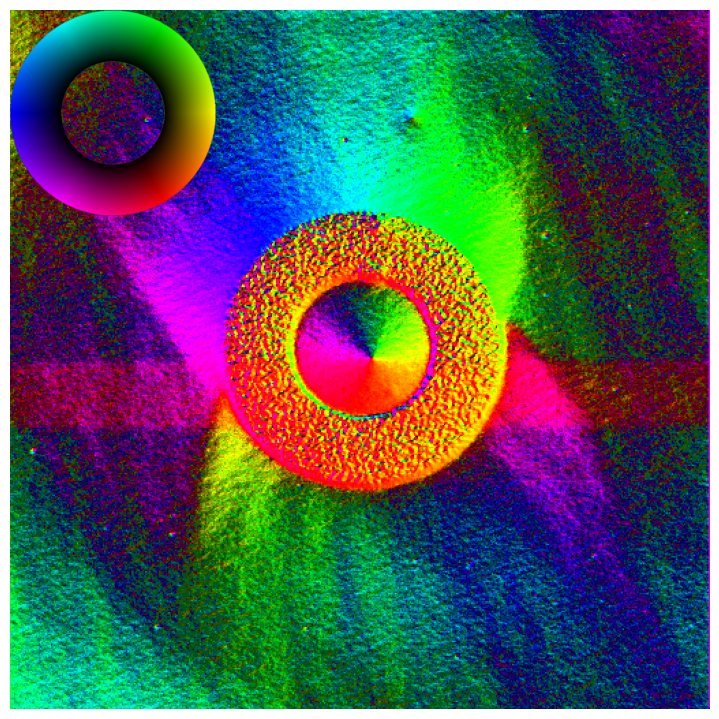

In [18]:
s1_dpc_linear_plane_masked.get_color_image_with_indicator(autolim_sigma=0.5)

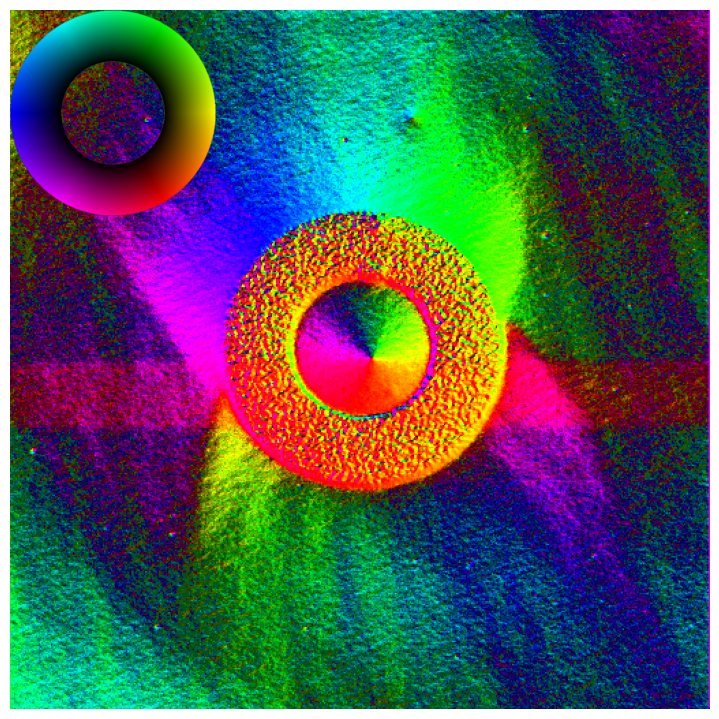

In [17]:
s1_dpc_linear_plane.get_color_image_with_indicator(autolim_sigma=0.5)

In [110]:
s1_color = s1_dpc_linear_plane.get_color_signal(autolim_sigma=0.5)

In [111]:
s1_color.plot()

In [113]:
s1_color.change_dtype("uint16")
s1_color.change_dtype("float64")

In [114]:
data_rgb = s1_color.data

In [116]:
data_rgb.shape

(322, 323, 3)

In [117]:
data_mask = np.zeros(data_rgb.shape[0:2], dtype=bool)

In [118]:
data_mask[150:] = True

In [119]:
data_rgb[data_mask] = np.array([0., 0., 0.])

In [120]:
extent = s.axes_manager.signal_extent
extent = [extent[0], extent[1], extent[3], extent[2]]

In [123]:
fig, ax = plt.subplots()

In [124]:
ax.imshow(data_rgb / 65536.0, extent=extent)